Irena Vent

# Deep Learning

*   **dataset**: Airbnb
*   **obetivo**: predecir el precio de un Airbnb en España

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [60]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Descargamos dataset Airbnb

In [62]:
# nos descargamos el dataset de OpenDataSoft
# !wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

In [63]:
#!ls -lah

## Carga de dataset Airbnb-listings


In [64]:
data = pd.read_csv('/content/drive/MyDrive/airbnb-listings.csv', sep = ';')
#data = pd.read_csv('airbnb-listings.csv', sep = ';')
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire ho

In [65]:
print('Tamaño del dataset "data" -->', data.shape)

Tamaño del dataset "data" --> (14001, 89)


## Carga de imágenes

In [66]:
n_images = np.load('/content/drive/MyDrive/images.npy')
was_loaded = np.load('/content/drive/MyDrive/was_loaded.npy')
no_loaded = np.count_nonzero(was_loaded == 0)

print('Tamaño n_images -->', n_images.shape)
print('Tamaño was_loaded -->', was_loaded.shape)
print('Número de muestras sin imágenes -->', no_loaded)

Tamaño n_images --> (14001, 224, 224, 3)
Tamaño was_loaded --> (14001,)
Número de muestras sin imágenes --> 2758


## Eliminar muestras sin imágenes en dataset "data" y "n_images"

In [67]:
# eliminamos muestras sin imagen del dataset 'data'
data_cheked_img = data[was_loaded == 1]

# eliminamos muestras sin imagen del dataset 'n_images'
load_n_images = n_images[was_loaded == 1]

"""
loaded = []
i = 0
for img in n_images:
  if was_loaded[i] == 1.0:
    loaded.append(img)
    i += 1
  else:
    i += 1
load_n_images = np.array(loaded)
"""

# mostramos datos eliminados
print('Tamaño del dataset "data_cheked_img" -->', data_cheked_img.shape)
print('Tamaño del dataset "load_n_images" -->', load_n_images.shape)
print('Número de muestras eliminadas -->', no_loaded)

Tamaño del dataset "data_cheked_img" --> (11243, 89)
Tamaño del dataset "load_n_images" --> (11243, 224, 224, 3)
Número de muestras eliminadas --> 2758


In [68]:
#data_cheked_img.head(5)

## **NOTA**: en este ejercicio haremos la división de train-test-validation después del pre-procesamiento de los datos.

## Exploración del dataset y pre-procesamiento de los datos

In [69]:
pd.set_option('display.max_rows', None)
data_cheked_img.head().T

,0,1,2,4,7
ID,15141125,9470166,17444981,499911,13440784
Listing Url,https://www.airbnb.com/rooms/15141125,https://www.airbnb.com/rooms/9470166,https://www.airbnb.com/rooms/17444981,https://www.airbnb.com/rooms/499911,https://www.airbnb.com/rooms/13440784
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Panoramic charming studio!,Comfortable penthouse in the center,Cosy Apartment SOL/LA LATINA,2 bedroom apartment downtown Madrid,Double Room in Center (Lavapies)
Summary,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,NaN,"Double room in the center, Lavapies multicultu..."
Space,It's a bright and cosy studio located in the h...,Quiet and comfortable space where you can rela...,Is a really cosy apartment with the best locat...,Bright and airy apartment in Central Madrid re...,NaN
Description,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,Bright and airy apartment in Central Madrid re...,"Double room in the center, Lavapies multicultu..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,The studio is located in the remarkable neighb...,It belongs to the district center of Madrid wh...,"La Latina is well known by El Rastro, the most...",NaN,NaN


Observamos que una gran parte de las variables no nos aportan información relevante. Por lo que decidimos eliminar las siguientes variables:

* ID
* Listing Url
* Scrape ID
* Last Scaped
* Name
* Summary - se podría tener en cuenta con NLP
* Space - se podría tener en cuenta con NLP
* Description - se podría tener en cuenta con NLP
* Experience Offerd - se podría tener en cuenta con NLP
* Neighborhood Overview - se podría tener en cuenta con NLP
* Notes - se podría tener en cuenta con NLP
* Transit - se podría tener en cuenta con NLP
* Access - se podría tener en cuenta con NLP
* Interaction - se podría tener en cuenta con NLP
* House Rules
* Thumbnail Url
* Medium Url
* Picture Url - ya tenemos las imágenes descargads;
* XL Picture Url - ídem;
* Host ID
* Host URL
* Host Name
* Host Since
* Host Location
* Host About - se podría tener en cuenta con NLP;
* Host Thumbnail Url
* Host Picture Url
* Host Neighbourhood
* Host Listings Count
* Host Total Listings Count
* Host Verifications
* Street - informacion redundante (mantenemos City);
* State - informacion redundante (mantenemos City);
* Market - informacion redundante (mantenemos City);
* Smart Location - informacion redundante (mantenemos City);
* Country Code - todas las muestras perteneces a ES
* Country - todas las muestras perteneces a Spain
* Weekly Price - valores redundantes
* Monthly Price - valores redundantes
* Calendar Update
* Calendar last Scraped
* First review
* Last review
* License
* Jurisdiction Name
* Calculated host listings count
* Reviews per Month - valores redundantres
* Geolocation
* Features - se podría tener en cuenta con NLP


In [70]:
data_filtered = data_cheked_img.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
                                      'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
                                      'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 
                                      'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Thumbnail Url', 
                                      'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 
                                      'Host Total Listings Count', 'Host Verifications', 'Street', 'State', 'Market', 'Smart Location', 
                                      'Country Code', 'Country', 'Weekly Price', 'Monthly Price', 'Calendar Updated','Calendar last Scraped', 
                                      'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Calculated host listings count', 
                                      'Reviews per Month','Geolocation', 'Features'], axis = 1)

In [71]:
data_filtered.shape

(11243, 40)

In [72]:
data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9884.0,96.135876,12.799912,0.000000,100.000000,100.000000,100.000000,100.000000
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,11243.0,40.430917,0.181328,39.317472,40.409705,40.419258,40.429490,41.434567
Longitude,11243.0,-3.454676,1.198039,-3.863907,-3.708086,-3.701096,-3.688899,3.467897
Accommodates,11243.0,3.125500,2.009759,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,11206.0,1.264546,0.627177,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11221.0,1.300686,0.836206,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,11204.0,1.970546,1.549973,1.000000,1.000000,1.000000,2.000000,16.000000
Square Feet,401.0,369.306733,553.142213,0.000000,0.000000,85.000000,646.000000,3767.000000
Price,11239.0,65.972773,63.041889,9.000000,30.000000,50.000000,80.000000,850.000000


In [73]:
data_filtered.dtypes

Host Response Time               object
Host Response Rate              float64
Host Acceptance Rate            float64
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Zipcode                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Square Feet                     float64
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64


In [74]:
data_filtered.isnull().sum()

Host Response Time               1359
Host Response Rate               1359
Host Acceptance Rate            11243
Neighbourhood                    4049
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      180
City                                5
Zipcode                           389
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          37
Bedrooms                           22
Beds                               39
Bed Type                            0
Amenities                         129
Square Feet                     10842
Price                               4
Security Deposit                 6599
Cleaning Fee                     4689
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Has Availabi

## Observaiones

**Tipos de variables**

* Existen variables como Neighbourhood, Neighbourhood Cleansed, Neighbourhood, Amenities, etc. del tipo *object* que deben ser transformadas y/o categorizadas;

**Valores nulos**

* Las variables Host Acceptance Rate y Has Availability pueden ser elmiminadas dado que la totalidad de las muestras presentan valores ausentes;
* La variable Square Feet presenta el 96% de su valores ausentes, del total de muestras, decidimos eliminar la varaible;
* La varible Zipcode parece tener datos erróneos, reisar y considerar la posibilidad de eliminar dicha varible, manteniendo Neighbourhood como varible representativa;
* Sobre las variables Neighbourhood, Neighbourhood Cleansed y Neighbourhood Group Cleansed se puede hacer un análisis pormenorizado para tomar la decisión de cuál de las tres varaibles podemos usar para el posterior estudio y si es necesario realizar algún tipo de clustering para optimizar;
* Todas las variables Review excepto Number of Reviews, presentan valores ausentes, la imputación según los datos, puede ser a través de la media o moda. Pero sería necesario valorar la opción de eliminar alguna de dichas variables con un estudio de correlaciones;
* Imputar los valores ausentes con la moda en Bed, Bedroom y Bathroom, el 75% de la muestra está dentro del rango, pues parece haber algún outlier;
* La variable objetivo Price tiene 4 muestras con valores ausentes, decidimos imputar dichas muestras con la media, prevío estudio a los psoibles outliers;

## Gráfico de correlaciones: eliminar variables altamente correladas

**Nota importante**: en este gráfico no aparecen las variables **object**, pero tomamos la decisión de comprobar las correlaciones antes de la imputación para ver si entre las variables numéricas existentes (en este punto del desarrollo) puede haber variables altamente correladas;

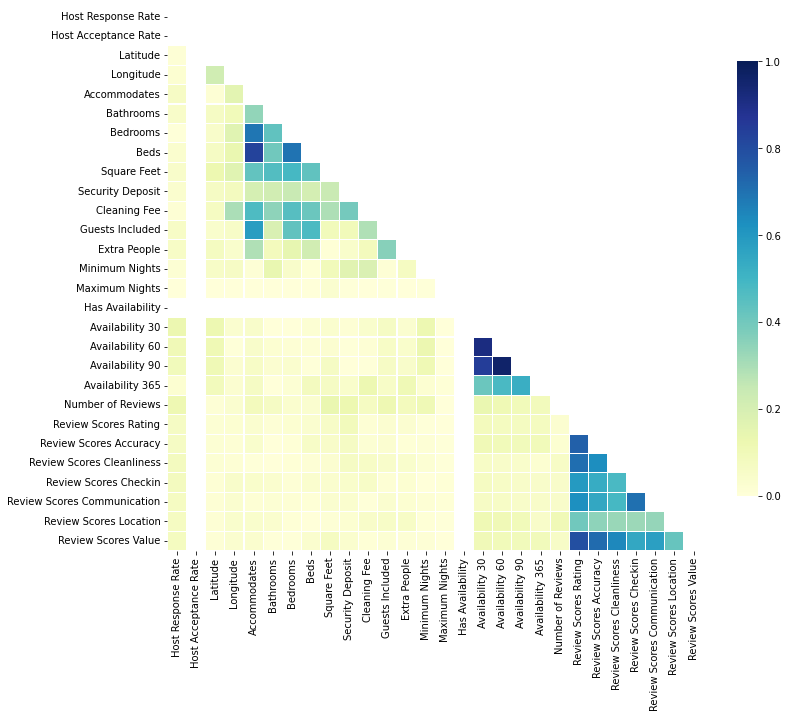

In [75]:
import seaborn as sns

corr = np.abs(data_filtered.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## Observaiones

* Accommodates y Bed están alatamente correlacionadas, por lo que puede haber problemas de colinealidad, decidimos eliminar Accommodates
* Vemos que las variables Review tienen una alta correlaciones, lo que haremos es generar una variable nueva que será la media de todas las Review
* Ocurre lo mismo con Avialability pero lo que haremos en este caso es quedarnos sólo con la variables Avialability 365


In [76]:
# generamos nueva variable Average Review
reviews = data_filtered.loc[: , "Review Scores Rating":"Review Scores Value"]
data_filtered['Average Review'] = reviews.mean(axis=1)

data_filtered.drop(['Host Response Time', 'Host Response Rate', 'Availability 30', 'Availability 60', 'Availability 90',
                    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 
                    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Neighbourhood', 'Latitude',
                    'Neighbourhood Group Cleansed', 'Accommodates', 'Host Acceptance Rate', 'Has Availability','Number of Reviews', 
                    'Square Feet', 'City', 'Zipcode', 'Maximum Nights','Minimum Nights', 'Bed Type', 'Neighbourhood Cleansed'], axis=1, inplace=True)

In [77]:
data_filtered.shape

(11243, 15)

In [78]:
data_filtered.columns

Index(['Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Amenities', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 365',
       'Cancellation Policy', 'Average Review'],
      dtype='object')

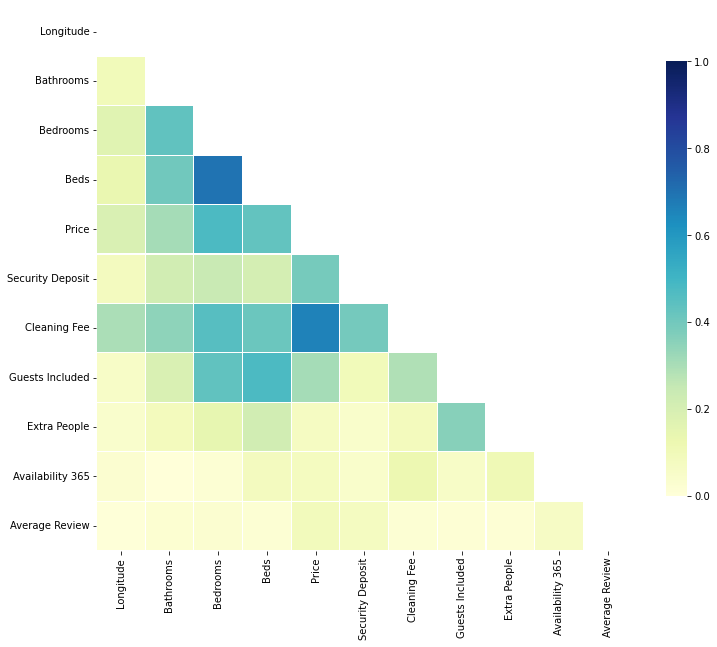

In [79]:
import seaborn as sns

corr = np.abs(data_filtered.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [80]:
#data_filtered.describe().T

## Transformación y categorización de variables



In [81]:
data_filtered.dtypes

Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Amenities               object
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Availability 365         int64
Cancellation Policy     object
Average Review         float64
dtype: object

In [82]:
columns = ['Room Type', 'Cancellation Policy', 'Property Type']

for column in columns:
    print (f'{column} --> {data_filtered[column].unique()}')
    print (f'{column} --> {len(data_filtered[column].unique())}')
    print (data_filtered[column].value_counts())

Room Type --> ['Entire home/apt' 'Private room' 'Shared room']
Room Type --> 3
Entire home/apt    6267
Private room       4797
Shared room         179
Name: Room Type, dtype: int64
Cancellation Policy --> ['moderate' 'strict' 'flexible' 'super_strict_30' 'super_strict_60']
Cancellation Policy --> 5
strict             4232
flexible           3672
moderate           3302
super_strict_60      19
super_strict_30      18
Name: Cancellation Policy, dtype: int64
Property Type --> ['Loft' 'Apartment' 'Condominium' 'Bed & Breakfast' 'House' 'Other'
 'Hostel' 'Guesthouse' 'Dorm' 'Chalet' 'Boutique hotel'
 'Serviced apartment' 'Villa' 'Guest suite' 'Casa particular' 'Tent'
 'Townhouse' 'Earth House' 'Bungalow' 'Camper/RV' 'Boat' 'Timeshare']
Property Type --> 22
Apartment             9088
House                  952
Bed & Breakfast        320
Condominium            296
Loft                   232
Other                  191
Guesthouse              39
Dorm                    34
Chalet                

## Observaciones y decisiones:


* Room Type pasará a ser variable categórica con 3 valores;
* Cancellation Policy pasará a ser variable categórica con 4 valores, super_strict_60 y super_strict_30 se van a agrupar en un único grupo, que representará al nuevo grupo super-strict;
* Property Type pasará a ser variable categórica con 6 valores, dado que los 5 primeros grupos explican más del 96% de las muestras, es decir, el resto de grupos pasaran a formar un solo grupo el de new_other;

* Amenities: observamos que es un varaibles separada por ',' por lo que podemos extraer el numero de palabras por cada muestra, usándolo como una caracterísitca/variable;

**NOTA** Descartamos hacer **MeanEncoder** (con Precio por categoría) y **LabelEncoder** porque ambas codificaciones pueden hacer que el modelo de más peso a unas etiquetas sobre otras dentro de una categoría.  

In [83]:
# Unificamos grupos 
data_filtered['Cancellation Policy'] = data_filtered['Cancellation Policy'].str.replace('super_strict_60', 'super_strict')
data_filtered['Cancellation Policy'] = data_filtered['Cancellation Policy'].str.replace('super_strict_30', 'super_strict')

p_types = ['Other', 'Chalet', 'Guesthouse', 'Dorm', 'Boutique hotel', 'Hostel', 'Serviced apartment',
          'Townhouse', 'Guest suite', 'Earth House', 'Tent', 'Timeshare', 'Villa', 'Casa particular',
          'Camper/RV', 'Bungalow', 'Boat']

for p_type in p_types:
    data_filtered['Property Type'] = data_filtered['Property Type'].str.replace(p_type, 'new_Other')

In [84]:
data_filtered['Property Type'].unique()

array(['Loft', 'Apartment', 'Condominium', 'Bed & Breakfast', 'House',
       'new_Other'], dtype=object)

In [85]:
# Codificamos Room, Bed, Property Type, Cancellation Policy y Neighbourhood Cleansed

data_filtered = pd.get_dummies(data_filtered, columns = ['Property Type','Cancellation Policy', 'Room Type'])

"""
MeanEncoder
def calc_mean(df, by, on, m): 
    mean = data_filtered[on].mean()
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + m * mean) / (counts + m)
    return df[by].map(smooth)

columns = ['Room Type', 'Property Type', 'Cancellation Policy']

for column in columns:
  data_filtered[column] = calc_mean(data_filtered, by=column, on='Price', m=data_filtered.shape[0])
"""

# Codificamos Amenities
df_l = data_filtered[['Amenities']]
df_l.fillna("", inplace=True)
df_l['Amenities'] = df_l['Amenities'].apply(lambda x: len(str(x).split(',')))

data_filtered['Amenities'].fillna("", inplace=True)
data_filtered['Amenities'] = data_filtered['Amenities'].apply(lambda x: len(str(x).split(',')))

In [86]:
data_filtered.shape

(11243, 25)

## Imputación de valores ausentes y tratamiento de outliers


In [87]:
data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,11243.0,-3.454676,1.198039,-3.863907,-3.708086,-3.701096,-3.688899,3.467897
Bathrooms,11206.0,1.264546,0.627177,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11221.0,1.300686,0.836206,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,11204.0,1.970546,1.549973,1.000000,1.000000,1.000000,2.000000,16.000000
Amenities,11243.0,14.344659,4.868576,1.000000,11.000000,14.000000,18.000000,34.000000
Price,11239.0,65.972773,63.041889,9.000000,30.000000,50.000000,80.000000,850.000000
Security Deposit,4644.0,180.644703,103.912818,70.000000,100.000000,150.000000,200.000000,950.000000
Cleaning Fee,6554.0,28.628013,21.795804,4.000000,15.000000,25.000000,35.000000,325.000000
Guests Included,11243.0,1.559815,1.126279,1.000000,1.000000,1.000000,2.000000,16.000000
Extra People,11243.0,7.200391,10.136541,0.000000,0.000000,0.000000,12.500000,276.000000


In [88]:
#data_filtered["Room Type"].unique()

In [89]:
data_filtered.isnull().sum()

Longitude                              0
Bathrooms                             37
Bedrooms                              22
Beds                                  39
Amenities                              0
Price                                  4
Security Deposit                    6599
Cleaning Fee                        4689
Guests Included                        0
Extra People                           0
Availability 365                       0
Average Review                      2415
Property Type_Apartment                0
Property Type_Bed & Breakfast          0
Property Type_Condominium              0
Property Type_House                    0
Property Type_Loft                     0
Property Type_new_Other                0
Cancellation Policy_flexible           0
Cancellation Policy_moderate           0
Cancellation Policy_strict             0
Cancellation Policy_super_strict       0
Room Type_Entire home/apt              0
Room Type_Private room                 0
Room Type_Shared

## Observaciones 

**Valores ausentes**

* Bathrooms, Bedroomsmm, Beds, Security Deposit y Cleaning Fee pueden ser imputadas con la moda/most_frequent;
* Vemos que la variable Bathrooms tiene muestras con 0, puede ser conveniente, depndiendo del número de muestras, imputar dichos valores;
* Average Review será imputada con la media;
* Price (4) será imputada con la media;

**Outliers**

* Bathrooms, Bedroomsmm, Beds, Price, Security Deposit, Cleaning Fee, Guests Included y Extra People parecen tener outliers. Graficaremos la distribución de valores y filtraremos los datos eliminando las muestras más dispares; 

In [90]:
print('Número de muestras con valor Bathrooms = 0 -->', (data_filtered['Bathrooms'] == 0).sum())

Número de muestras con valor Bathrooms = 0 --> 57


In [91]:
data_filtered.loc[data_filtered['Bathrooms'] == 0,'Bathrooms'] = np.nan
print('Número de muestras con valor Bathrooms = 0 -->', (data_filtered['Bathrooms'] == 0).sum())

Número de muestras con valor Bathrooms = 0 --> 0


In [92]:
from sklearn.impute import SimpleImputer

# Imputamos valores con most_frequent
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer_mf_1 = imputer_mf.fit(data_filtered[['Bathrooms']])
imputer_mf_2 = imputer_mf.fit(data_filtered[['Bedrooms']])
imputer_mf_3 = imputer_mf.fit(data_filtered[['Beds']])
imputer_mf_4 = imputer_mf.fit(data_filtered[['Security Deposit']])
imputer_mf_5 = imputer_mf.fit(data_filtered[['Cleaning Fee']])

data_filtered[['Bathrooms']] = imputer_mf_1.transform(data_filtered[['Bathrooms']])
data_filtered[['Bedrooms']] = imputer_mf_2.transform(data_filtered[['Bedrooms']])
data_filtered[['Beds']] = imputer_mf_3.transform(data_filtered[['Beds']])
data_filtered[['Security Deposit']] = imputer_mf_4.transform(data_filtered[['Security Deposit']])
data_filtered[['Cleaning Fee']] = imputer_mf_5.transform(data_filtered[['Cleaning Fee']])

# Imputamos valores con mean
imputer_mn = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer_mn_1 = imputer_mn.fit(data_filtered[['Price']])
imputer_mn_2 = imputer_mn.fit(data_filtered[['Average Review']])

data_filtered[['Price']] = imputer_mn_1.transform(data_filtered[['Price']])
data_filtered[['Average Review']] = imputer_mn_2.transform(data_filtered[['Average Review']])

In [93]:
data_filtered.columns

Index(['Longitude', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 365', 'Average Review', 'Property Type_Apartment',
       'Property Type_Bed & Breakfast', 'Property Type_Condominium',
       'Property Type_House', 'Property Type_Loft', 'Property Type_new_Other',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_strict', 'Cancellation Policy_super_strict',
       'Room Type_Entire home/apt', 'Room Type_Private room',
       'Room Type_Shared room'],
      dtype='object')

## Outliers

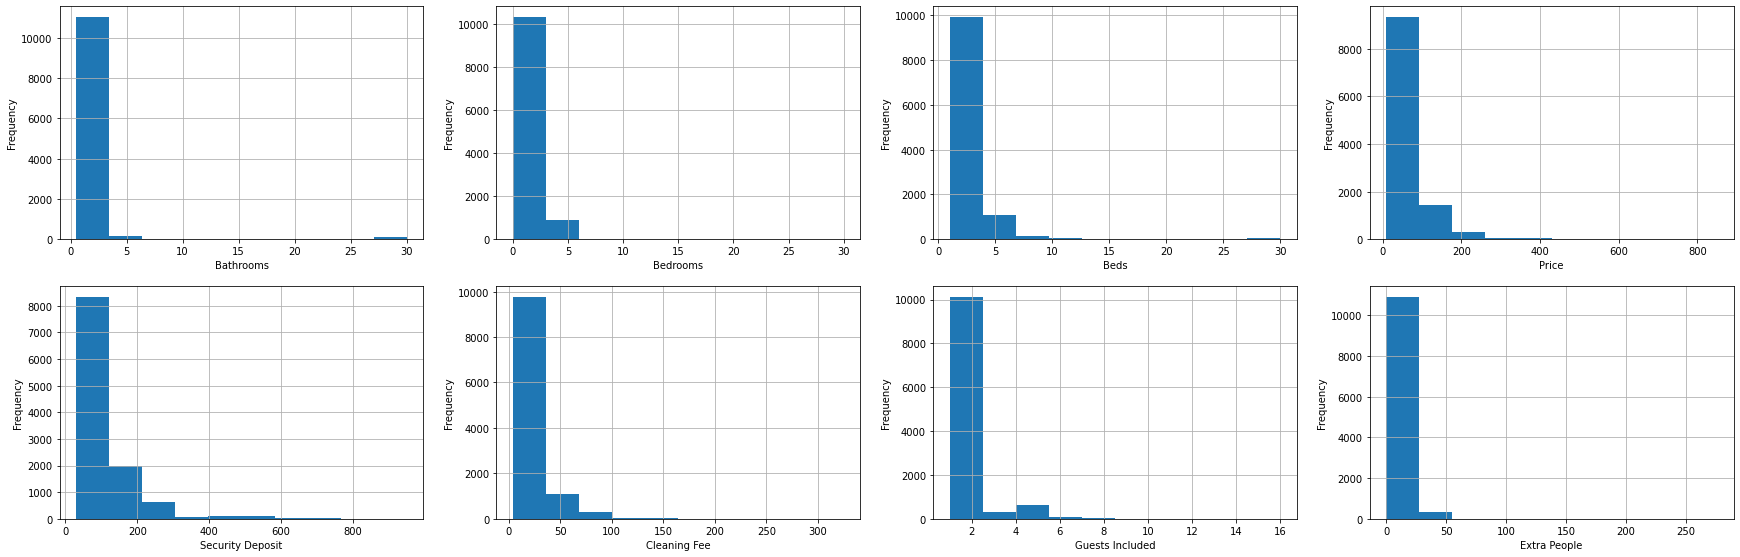

In [94]:
columns = ['Bathrooms', 'Bedrooms', 'Beds','Price', 'Security Deposit', 'Cleaning Fee', 
           'Guests Included', 'Extra People']
plt.figure(figsize=(30, 30))

for n, col in enumerate(columns):
    plt.subplot(6,4,n+1)
    data_filtered[col].plot.hist(grid = True)
    plt.axis()
    plt.xlabel(col)

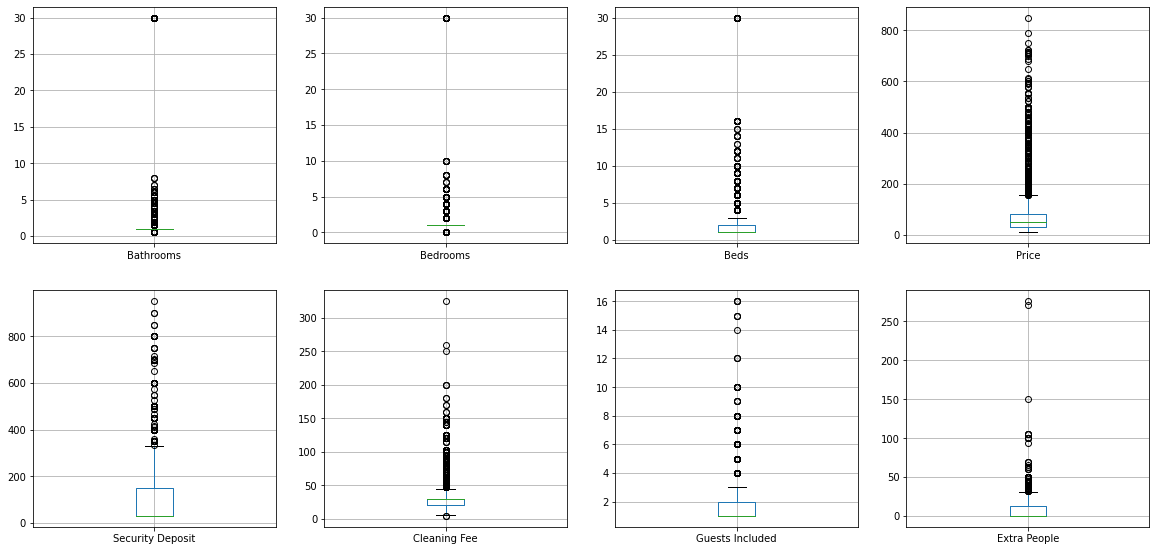

In [95]:
columns = ['Bathrooms', 'Bedrooms', 'Beds','Price', 'Security Deposit', 'Cleaning Fee', 
           'Guests Included', 'Extra People']

plt.figure(figsize=(20, 20))

for n, col in enumerate(columns):
    plt.subplot(4,4,n+1)
    data_filtered.boxplot(col)

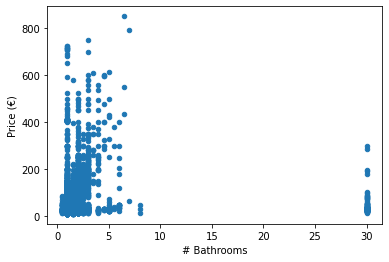

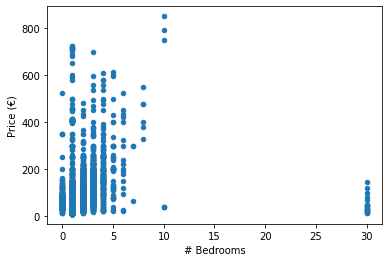

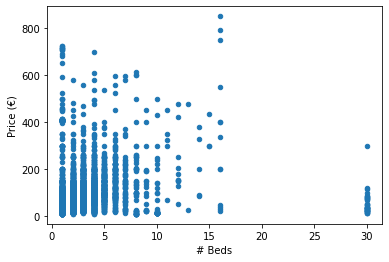

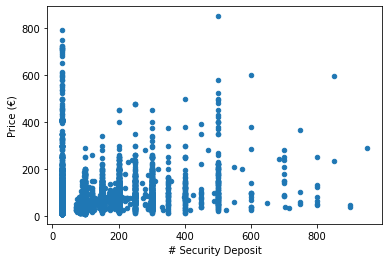

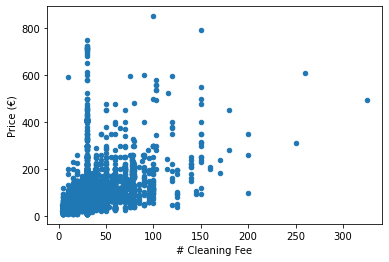

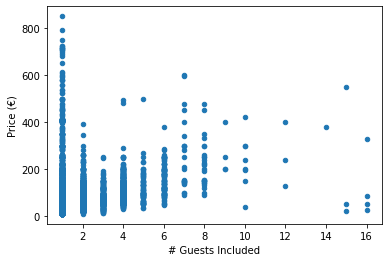

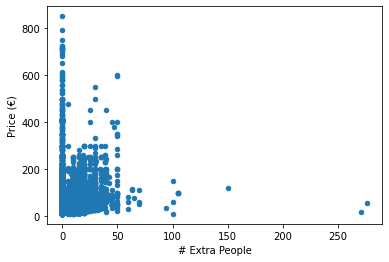

In [96]:
data_filtered.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('# Security Deposit')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('# Cleaning Fee')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('# Guests Included')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('Price (€)')
plt.show()

In [97]:
# Hacemos reset del index del dataset
data_filtered.reset_index(drop=True, inplace=True)

# almacenamos los índices eliminados de 'data_filtered' 
# que posteriormente usaremos para eliminar 
# las muestras del dataset load_n_images


index_Bath = data_filtered.index[data_filtered['Bathrooms'] >= 15].tolist()
index_Bed = data_filtered.index[data_filtered['Bedrooms'] >= 10].tolist()
index_Beds = data_filtered.index[data_filtered['Beds'] >= 15].tolist()
index_Deposit = data_filtered.index[data_filtered['Security Deposit'] >= 600].tolist()
index_Clean = data_filtered.index[data_filtered['Cleaning Fee'] >= 200].tolist()
index_Guests = data_filtered.index[data_filtered['Guests Included'] >= 10].tolist()
index_Extra = data_filtered.index[data_filtered['Extra People'] >= 90].tolist()
index_Price = data_filtered.index[data_filtered['Price'] >= 400].tolist()
"""
index_Bath = data_filtered.query("Bathrooms > 6").index.tolist()
index_Bed = data_filtered.query("Bedrooms > 6").index.tolist()
index_Beds = data_filtered.query("Beds > 10").index.tolist()
index_Price = data_filtered.query("Price > 500").index.tolist()
"""
# combinamos las listas de index
index_list = np.unique(np.concatenate((index_Bath, index_Bed, index_Beds, index_Deposit, index_Clean, index_Guests, index_Extra, index_Price),0))

#print(index_list)
print('Número de muestras eliminadas --> ',(len(index_list)))

Número de muestras eliminadas -->  312


In [98]:
#data_filtered.iloc[[348]]

In [99]:
# Eliminamos outliers
data_filtered = data_filtered[data_filtered['Bathrooms'] < 15]
data_filtered = data_filtered[data_filtered['Bedrooms'] < 10]
data_filtered = data_filtered[data_filtered['Beds'] < 15]
data_filtered = data_filtered[data_filtered['Security Deposit'] < 600]
data_filtered = data_filtered[data_filtered['Cleaning Fee'] < 200]
data_filtered = data_filtered[data_filtered['Guests Included'] < 10]
data_filtered = data_filtered[data_filtered['Extra People'] < 90]
data_filtered = data_filtered[data_filtered['Price'] < 400]

print(f'Porcentaje de muestras eliminadas: {round((len(index_list))/data_filtered.shape[0]*100,4)} %')
print(f'Tamaño data_filtered: {data_filtered.shape}')

Porcentaje de muestras eliminadas: 2.8543 %
Tamaño data_filtered: (10931, 25)


In [100]:
# Eliminamos las imágenes pertenecietes a los outliers
filter_imgs = []
i = 0

for img in load_n_images:
  if i not in index_list:
    filter_imgs.append(img)
    i += 1
  else:
    i += 1

load_n_images = np.array(filter_imgs)

print('Tamaño del dataset "load_n_images" tras eliminar outliers -->', load_n_images.shape)

Tamaño del dataset "load_n_images" tras eliminar outliers --> (10931, 224, 224, 3)


In [101]:
# movemos la variable objetivo en la primera posición
first_column = data_filtered.pop('Price')
data_filtered.insert(0, 'Price', first_column)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10931 entries, 0 to 11242
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price                             10931 non-null  float64
 1   Longitude                         10931 non-null  float64
 2   Bathrooms                         10931 non-null  float64
 3   Bedrooms                          10931 non-null  float64
 4   Beds                              10931 non-null  float64
 5   Amenities                         10931 non-null  int64  
 6   Security Deposit                  10931 non-null  float64
 7   Cleaning Fee                      10931 non-null  float64
 8   Guests Included                   10931 non-null  int64  
 9   Extra People                      10931 non-null  int64  
 10  Availability 365                  10931 non-null  int64  
 11  Average Review                    10931 non-null  float64
 12  Prop

In [102]:
data_filtered.reset_index(drop=True, inplace=True)

In [103]:
data_filtered.head()

,Price,Longitude,Bathrooms,Bedrooms,Beds,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 365,Average Review,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Condominium,Property Type_House,Property Type_Loft,Property Type_new_Other,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,50.0,-3.707995,1.0,0.0,1.0,15,100.0,20.0,2,15,66,22.285714,0,0,0,0,1,0,0,1,0,0,1,0,0
1,50.0,-3.705006,1.0,1.0,2.0,16,250.0,15.0,2,25,347,18.857143,1,0,0,0,0,0,0,0,1,0,1,0,0
2,77.0,-3.706823,1.5,1.0,2.0,18,30.0,25.0,1,0,155,21.000000,1,0,0,0,0,0,0,1,0,0,1,0,0
3,95.0,-3.701155,1.0,2.0,4.0,10,200.0,60.0,4,0,237,22.428571,1,0,0,0,0,0,0,0,1,0,1,0,0
4,30.0,-3.704043,1.5,1.0,1.0,16,30.0,30.0,1,0,0,18.571429,1,0,0,0,0,0,0,1,0,0,0,1,0


## DATASET --> DATOS NUMÉRICOS Y CATEGÓRICOS

Normlaización

División en train-test-validation (nos quedamos con las **1400 primeras muestras**)

## Normalización de los datos

In [104]:
#data_filtered.columns

In [125]:
from sklearn.preprocessing import MinMaxScaler

# dividimos entre variable objetivo 'y' Price  y variables predictoras 'X_num'
data_norm = data_filtered.values
y = data_norm[:,0:1]
X_num = data_norm[:,1:]

# normalizamos los datos entre 0 y 1
scaler_Price = MinMaxScaler(feature_range=(0,1))
scaler_Vars = MinMaxScaler(feature_range=(0,1))

y = scaler_Price.fit_transform(y)
X = scaler_Vars.fit_transform(X_num)

# unificamos type
y = y.astype('float64')
X_num = X.astype('float64')

# hacemos reshape de y
y = y.reshape(-1)

print(f'Tamaño X_num: {X_num.shape}')
print(f'Tamaño de y: {y.shape}')
print(f'dtaype de X_num: {X_num.dtype}')
print(f'dtaype de y: {y.dtype}')

Tamaño X_num: (10931, 24)
Tamaño de y: (10931,)
dtaype de X_num: float64
dtaype de y: float64


## División de los datos

In [126]:
# nos quedamos con las primeras 1400 muestras
X_num = X_num[0:1400,:]
y = y[0:1400]

print(f'Dimensiones del X_num tras la selección: {X_num.shape}')
print(f'Dimensiones del y tras la selección: {y.shape}')

Dimensiones del X_num tras la selección: (1400, 24)
Dimensiones del y tras la selección: (1400,)


In [127]:
from sklearn.model_selection import train_test_split

# dividimos en train-test
SEED = 0
validation_split = 0.2

X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=validation_split, random_state=SEED)

print(f'Dimensiones del dataset de X_training: {X_num_train.shape}')
print(f'Dimensiones del dataset de X_test: {X_num_test.shape}')

# dividimos en train-validation
SEED = 0
validation_split = 0.1

X_num_train, X_num_val, y_train, y_val = train_test_split(X_num_train, y_train, test_size=validation_split, random_state=SEED)

print(f'Dimensiones del dataset de training: {X_num_train.shape}')
print(f'Dimensiones del dataset de validation: {X_num_val.shape}')

Dimensiones del dataset de X_training: (1120, 24)
Dimensiones del dataset de X_test: (280, 24)
Dimensiones del dataset de training: (1008, 24)
Dimensiones del dataset de validation: (112, 24)


## DATASET --> IMÁGENES

Normlaización

División en train-test-validation (nos quedamos con las **1400 primeras muestras**)

## Normalización de los datos

In [119]:
# seleccionamos las 1400 primeras muestras
select_load_n_images = []

for i in range(1,1401):
  arr = load_n_images[i,:,:,:]
  select_load_n_images.append(arr)

select_load_n_images = np.array(select_load_n_images)

print(f'Dimensiones del dataset tras la selección: {select_load_n_images.shape}')

# normalizamos los datos
select_load_n_images = select_load_n_images.astype('float64')
select_load_n_images = select_load_n_images / 255.

print(f'Dtaype: {select_load_n_images.dtype}')
print(f'Rango de valor mínimo dentro del array: {np.min(select_load_n_images)}')

Dimensiones del dataset tras la selección: (1400, 224, 224, 3)
Dtaype: float64
Rango de valor mínimo dentro del array: 0.0


## División de los datos

In [120]:
from sklearn.model_selection import train_test_split

# dividimos en train-test
SEED = 0
validation_split = 0.2

X_img_train, X_img_test = train_test_split(select_load_n_images, test_size=validation_split, random_state=SEED)

print(f'Dimensiones del dataset de training: {X_img_train.shape}')
print(f'Dimensiones del dataset de test: {X_img_test.shape}')

# dividimos en train-validation
SEED = 0
validation_split = 0.1

X_img_train, X_img_val = train_test_split(X_img_train, test_size=validation_split, random_state=SEED)

print(f'Dimensiones del dataset de training: {X_img_train.shape}')
print(f'Dimensiones del dataset de validation: {X_img_val.shape}')

Dimensiones del dataset de training: (1120, 224, 224, 3)
Dimensiones del dataset de test: (280, 224, 224, 3)
Dimensiones del dataset de training: (1008, 224, 224, 3)
Dimensiones del dataset de validation: (112, 224, 224, 3)


In [110]:
(y_val).shape

(112,)

## MODELO - PERCEPTRÓN MULTICAPA - DATOS NUMÉRICOS Y CATEGÓRICOS

In [187]:
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# dividimos entre variable objetivo 'y' Price  y variables predictoras 'X_num'
data_norm = data_filtered.values
y = data_norm[:,0:1]
X_num = data_norm[:,1:]

# normalizamos los datos entre 0 y 1
scaler_Price = MinMaxScaler(feature_range=(0,1))
scaler_Vars = MinMaxScaler(feature_range=(0,1))
y = scaler_Price.fit_transform(y)
X = scaler_Vars.fit_transform(X_num)

# unificamos type
y = y.astype('float64')
X_num = X.astype('float64')

# hacemos reshape de y
y = y.reshape(-1)

X_num = X_num[0:1400,:]
y = y[0:1400]

# dividimos en train-test
SEED = 0
validation_split = 0.2
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=validation_split, random_state=SEED)

# dividimos en train-validation
SEED = 0
validation_split = 0.1
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num_train, y_train, test_size=validation_split, random_state=SEED)


# <<<< MODELO MP >>>

# Definimos nuestra grid
epochs = [20, 50, 100]
batch_size = [32, 64, 128]

def mp_model (ep, bs):

  # definimos modelo 
  mp_model = Sequential()
  mp_model.add(Dense(16, activation = 'relu', kernel_initializer = tf.keras.initializers.GlorotNormal(), input_shape = (X_num_train.shape[1],)))
  mp_model.add(Dense(8, activation = 'relu', kernel_initializer = tf.keras.initializers.GlorotNormal()))
  mp_model.add(Dense(1, activation = 'sigmoid'))

  # Compilamos el modelo
  mp_model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

  # fit
  history = mp_model.fit(X_num_train, y_train, validation_data =(X_num_val, y_val), epochs= ep, batch_size= bs)

  loss, mse = mp_model.evaluate(X_num_val, y_val)
  
  print('Red con ep={}, bs={}. Loss: {}. Mse: {}.'.format(ep, bs, loss, mse))      
  return mse

log_accuracies = []
i = 1

# empezamos el grid search
for ep in epochs:
  for bs in batch_size:
    result_mp_model=mp_model(ep,bs)
    print('[{}]' 'Resultado: {}'.format(i, result_mp_model))
    log_accuracies.append(result_mp_model)
    i += 1

# y el mejor resultado sería
import numpy as np
idx_max = np.nonzero(log_accuracies==np.max(log_accuracies))
print(idx_max)

print('Best execution: {}. MSE: {}'.format(idx_max[0][0], log_accuracies[idx_max[0][0]]))

  # Evaluamos el modelo 
  #loss, mse = mp_model.evaluate(X_num_val, y_val)
  #val_predict = mp_model.predict(X_num_val)

Epoch 1/20
32/32 [==============================] - 1s 7ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0070 - mse: 0.00

In [192]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# dividimos entre variable objetivo 'y' Price  y variables predictoras 'X_num'
data_norm = data_filtered.values
y = data_norm[:,0:1]
X_num = data_norm[:,1:]

# normalizamos los datos entre 0 y 1
scaler_Price = MinMaxScaler(feature_range=(0,1))
scaler_Vars = MinMaxScaler(feature_range=(0,1))
y = scaler_Price.fit_transform(y)
X = scaler_Vars.fit_transform(X_num)

# unificamos type
y = y.astype('float64')
X_num = X.astype('float64')

# hacemos reshape de y
y = y.reshape(-1)

X_num = X_num[0:1400,:]
y = y[0:1400]

# dividimos en train-test
SEED = 0
validation_split = 0.2
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=validation_split, random_state=SEED)

# dividimos en train-validation
SEED = 0
validation_split = 0.1
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num_train, y_train, test_size=validation_split, random_state=SEED)

# <<<< Definimos el modelo >>>
mp_model_1 = Sequential()
mp_model_1.add(Dense(16, activation = 'relu', kernel_initializer = tf.keras.initializers.GlorotNormal(), input_shape = (X_num_train.shape[1],)))
mp_model_1.add(Dense(8, activation = 'relu', kernel_initializer = tf.keras.initializers.GlorotNormal()))
#mp_model.add(Dense(4, activation = 'relu', kernel_initializer = tf.keras.initializers.GlorotNormal()))
#mp_model.add(Dropout(0.3))
mp_model_1.add(Dense(1, activation = 'sigmoid'))

# Arquietectura del modelo
mp_model_1.summary()

Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_589 (Dense)           (None, 16)                400       
                                                                 
 dense_590 (Dense)           (None, 8)                 136       
                                                                 
 dense_591 (Dense)           (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
8/8 - 1s - loss: 0.1035 - mse: 0.1035 - val_loss: 0.0918 - val_mse: 0.0918 - 649ms/epoch - 81ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0752 - val_mse: 0.0752 - 69ms/epoch - 9ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0599 - val_mse: 0.0599 - 51ms/epoch - 6ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0470 - val_mse: 0.0470 - 40ms/epoch - 5ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0370 - val_mse: 0.0370 - 39ms/epoch - 5ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0297 - val_mse: 0.0297 - 35ms/epoch - 4ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0246 - val_mse: 0.0246 - 48ms/epoch - 6ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0212 - val_mse: 0.0212 - 37ms/epoch - 5ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0188 - val_mse: 0.0188 - 37ms/epoch - 5ms/step

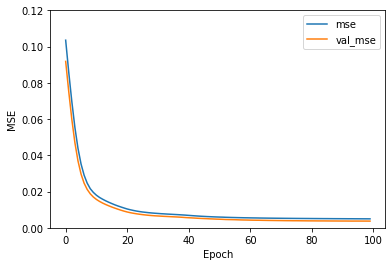

Validation loss: 0.0036890816409140825
Validation mae: 0.0036890816409140825


In [193]:
# Compilamos el modelo
mp_model_1.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

# fit
history = mp_model_1.fit(X_num_train, y_train, validation_data=(X_num_val, y_val), epochs=100, batch_size=128, verbose=2)

# Evaluamos el modelo 
loss, mse = mp_model_1.evaluate(X_num_val, y_val)
val_predict = mp_model_1.predict(X_num_val)

# Ploteamos las curvas de aprendizaje
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.ylim([0, 0.12])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

print('Validation loss:', loss)
print('Validation mae:', mse)

In [194]:
# reescalamos array
y_val = y_val.reshape((-1,1))

# desnormalizamos 
Y_val_predict = scaler_Price.inverse_transform(val_predict)
y_val = scaler_Price.inverse_transform(y_val)

# cominamos arrays y reescalamos
my_array = np.array([y_val,Y_val_predict])
my_array = my_array.reshape(-1, 2)

# creamos DF para comparar
df_y = pd.DataFrame(my_array, columns = ['GT_val', 'Predict_val_Price'])
df_y.head(10)

,GT_val,Predict_val_Price
0,22.0,75.0
1,105.0,60.0
2,60.0,25.0
3,49.0,47.0
4,39.0,49.0
5,60.0,40.0
6,130.0,59.0
7,89.0,80.0
8,177.0,270.0
9,45.0,57.0


In [198]:
print(df_y['GT_val'].mean())
print(df_y['Predict_val_Price'].mean())
print(data_filtered['Price'].mean())

60.88056027889252
60.428955231394085
61.56463405663992


## Observaciones

*  Vemos que nuestro modelo tiene un mejor comportamiento en el dataset de validación que en train, esto es posible por el número de muestras utilizado como por haber realizado la separación de train-test-validation splir posterior al pre-procesamiento de los datos.
* El gráfico muestra un buen ajuste del modelo, con un **mse** bajo podemos dar por válido el modelo



In [201]:
difference = val_predict - y_val
percentDIFF = (difference / y_val) * 100
absolut = np.abs(percentDIFF)

mean = np.mean(absolut)
percentDIFF

array([[-99.67875318],
       [-99.75414399],
       [-99.85806803],
       [-99.75784858],
       [-99.76010978],
       [-99.77540421],
       [-99.72054806],
       [-99.70277408],
       [-99.82464994],
       [-99.74222676],
       [-99.79305089],
       [-99.69598122],
       [-99.83514628],
       [-99.72585667],
       [-99.76788424],
       [-99.74192072],
       [-99.79267383],
       [-99.86401666],
       [-99.70329649],
       [-99.76560719],
       [-99.77968787],
       [-99.81916514],
       [-99.46673782],
       [-99.81955516],
       [-99.79429924],
       [-99.83993539],
       [-99.79034451],
       [-99.83961874],
       [-99.83937106],
       [-99.71701232],
       [-99.81664984],
       [-99.83090325],
       [-99.85156363],
       [-99.87141183],
       [-99.76989114],
       [-99.87961777],
       [-99.82346203],
       [-99.66762948],
       [-99.81335044],
       [-99.8449407 ],
       [-99.79599908],
       [-99.72040493],
       [-99.78992939],
       [-99

In [116]:

"""
data_norm = data_filtered
scaler_Price = MinMaxScaler(feature_range=(0,1))
scaler_Vars = MinMaxScaler(feature_range=(0,1))
data_norm = pd.DataFrame(scaler.fit_transform(data_norm), columns = data_norm.columns)
_________
# dividimos entre variable objetivo Price y variables predictoras
y = data_filtered['Price']
y = y.reshape((-1,1))
X = data_filtered.drop(['Price'], axis = 1)

# normalizamos los datos con rango de 0 a 1
scaler_Price = MinMaxScaler(feature_range=(0,1))
scaler_Vars = MinMaxScaler(feature_range=(0,1))

y = scaler_Price.fit_transform(y)
y = pd.DataFrame(scaler_Price.fit_transform(y), columns = y.columns)
X = pd.DataFrame(scaler_Vars.fit_transform(X), columns = X.columns)

_________
from sklearn.preprocessing import MinMaxScaler

# nomralizamos los datos
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(y)
X_num = scaler.fit_transform(X_num)

print(f'Rango de valor mínimo dentro del array X_num: {np.min(X_num)}')

"""

"\ndata_norm = data_filtered\nscaler_Price = MinMaxScaler(feature_range=(0,1))\nscaler_Vars = MinMaxScaler(feature_range=(0,1))\ndata_norm = pd.DataFrame(scaler.fit_transform(data_norm), columns = data_norm.columns)\n_________\n# dividimos entre variable objetivo Price y variables predictoras\ny = data_filtered['Price']\ny = y.reshape((-1,1))\nX = data_filtered.drop(['Price'], axis = 1)\n\n# normalizamos los datos con rango de 0 a 1\nscaler_Price = MinMaxScaler(feature_range=(0,1))\nscaler_Vars = MinMaxScaler(feature_range=(0,1))\n\ny = scaler_Price.fit_transform(y)\ny = pd.DataFrame(scaler_Price.fit_transform(y), columns = y.columns)\nX = pd.DataFrame(scaler_Vars.fit_transform(X), columns = X.columns)\n\n_________\nfrom sklearn.preprocessing import MinMaxScaler\n\n# nomralizamos los datos\nscaler = MinMaxScaler(feature_range=(0,1))\ny = scaler.fit_transform(y)\nX_num = scaler.fit_transform(X_num)\n\nprint(f'Rango de valor mínimo dentro del array X_num: {np.min(X_num)}')\n\n"

In [ ]:
"""
difference = val_predict - y_val
percentDIFF = (difference / y_val) * 100
absolut = np.abs(percentDIFF)

mean = np.mean(absolut)
std = np.std(absolut)
print(mean, std)
"""